<a href="https://colab.research.google.com/github/chanzae/Study-logs/blob/main/nn_Modul_%26_nn_Parameter%26Backward%26loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 이 자료는 네이버 부스트코스의 [파이토치로 만드는 딥러닝 이론]을 듣고 작성한 노트입니다.
- Google colab 환경에서 작업하였습니다.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

nn.Module을 통해 기본적으로 PyTorch에 구현되어 있는 네트워크 텐서 모듈들을 살펴보고 nn.Parameter이 Module 내부에서 어떤 역할을 하는지 알아봅시다.
<br>
<br>
## **nn.Module**
딥러닝 모델은 복잡한 구조로 되어 있는 것처럼 보이지만 사실 몇 개의 코어 블록의 반복입니다. torch.nn.Module은 모든 layer의 Base Class입니다. nn.Module을 상속하여 새로운 블록을 정의하고 앞서 존재하는 다양한 torch의 layer를 가져와 새로운 Neural Network class를 쉽게 만들 수 있습니다.
- 딥러닝을 구성하는 layer의 base class
- Input, Output, Forward, Backward 정의
- 학습의 대상이 되는 parameter(tensor) 정의  
<br>

## **nn.Parameter**
- Tensor 객체의 상속 객체
- nn.Module 내에 attribute가 될 때는 required_grad = True로 지정되어 학습 대상이 되는 Tensor
- 우리가 직접 지정할 일은 잘 없음  
  : 대부분의 layer에는 weights값들이 지정되어 있음

In [18]:
import torch
from torch import nn
from torch import Tensor

class MyLiner(nn.Module):
  def __init__(self, in_features, out_features, bias=True):
    super().__init__()
    self.in_features = in_features
    self.out_features = out_features

    self.weights = nn.Parameter(
        torch.randn(in_features, out_features))
    
    self.bias = nn.Parameter(torch.randn(out_features))

  def forward(self, x : Tensor):  # xw + b 형태
    return x @ self.weights + self.bias

In [7]:
x = torch.randn(5,7) # 데이터 5개, feature 7개

In [20]:
layer = MyLiner(7, 12)
layer(x).shape

torch.Size([5, 12])

In [21]:
# Parameter의 weights값과 backward의 대상이 되는지 아닌지 여부 확인 가능
for value in layer.parameters():
  print(value)

Parameter containing:
tensor([[-1.3303, -0.1662, -1.0698,  1.3758, -1.4334, -0.1310, -0.3034,  2.0012,
         -0.2472, -0.4917,  0.9469,  0.1036],
        [ 0.1379, -0.3147,  0.6276, -1.0388,  2.3444, -1.0008,  0.8532, -0.1276,
          0.3748, -2.0094,  2.6430, -0.0298],
        [-0.4365,  0.8554, -1.1523,  1.4404,  1.2282,  0.1070, -0.5785, -1.2614,
         -0.1760, -0.1143,  0.1023,  0.1423],
        [ 0.4766, -0.3591, -0.4421,  0.2242,  0.8784, -0.0087, -0.4459,  1.2215,
          0.8695,  0.7880,  0.7616,  0.8635],
        [ 0.4625,  1.2206,  1.2883,  0.7928,  0.1455, -0.9839,  1.1096, -1.0586,
          1.3943,  1.1412,  0.0945, -0.3287],
        [-1.4180,  1.7613, -0.9187,  1.5242,  0.6521,  1.0539, -1.0750,  1.4087,
         -1.3175,  2.4152, -1.6579,  1.0351],
        [ 1.1794,  0.6479,  1.1695, -1.8499,  2.7646,  0.9501,  1.3354, -0.0541,
          1.2763, -0.3787,  0.5824,  1.0953]], requires_grad=True)
Parameter containing:
tensor([ 0.2933,  0.6245, -1.6092, -0.0034, -1

In [24]:
# 만약에 nn.Paramter가 아니라 Tensor로 선언한다면,...

class MyLiner(nn.Module):
  def __init__(self, in_features, out_features, bias=True):
    super().__init__()
    self.in_features = in_features
    self.out_features = out_features

    self.weights = Tensor(
        torch.randn(in_features, out_features))
    
    self.bias = Tensor(torch.randn(out_features))

  def forward(self, x : Tensor):  # xw + b 형태
    return x @ self.weights + self.bias

layer = MyLiner(7, 12)
layer(x)

tensor([[-0.6172,  0.1696, -0.1537,  1.5162, -2.0323, -3.9386, -1.0833,  4.5306,
         -0.3198,  3.4278,  2.6819,  1.6545],
        [-1.0068, -0.0809, -1.2736,  3.6248, -0.4859,  2.3301,  6.4828, -1.4413,
          0.5953, -0.2085,  4.1980,  1.2532],
        [-0.1606, -1.1998,  0.9379, -2.0377, -1.9360, -2.5440, -3.0225,  3.6944,
         -0.0780,  2.6676, -0.8539,  1.5198],
        [-2.6842, -1.3352,  4.2016, -2.4188, -0.6146, -1.9166, -0.7399, -1.9945,
         -1.3869,  1.4383, -2.6655,  1.3403],
        [-0.4013, -2.8886,  1.6358, -3.3263,  2.9174, -1.8678,  1.7535, -5.6243,
          0.7842, -0.3855,  1.5708, -0.2145]])

In [25]:
# 값이 나오지 않음.
# .parameters()는 미분의 대상이 되는 값만 보여주기 때문
for value in layer.parameters():
  print(value)

---
## **Backward**
- layer에 있는 parameter들의 미분을 수행
- Forward의 결과값 (model의 output = 예측치)과 실제값간의 차이(loss)에 대해 미분을 수행
- 해당값으로 parameter업데이트
<br>

## **Loss function**
Loss function란, 입력값(Input)에 대한 Model의 출력값(Output)과  정답값(Label)의 차이를 비교해 모델의 출력값이 얼마나 잘 예측했는 가를 나타내는 함수다. Loss function에는 여러가지 함수 있는데 많이 쓰이는 함수에 대해 소개하면,
- MSE(Mean Squared Error) Loss  : 회귀(Regression)문제에서 많이 쓰이는 함수, 출력값(Output)과 정답값(Label)의 차이의 제곱에 대해 측정
- CE(Cross Entropy) Loss: 분류(Classification)문제에서 많이 쓰이는 함수
 
 

In [26]:
import numpy as np
#create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype = np.float32)
x_train = x_train.reshape(-1,1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype = np.float32)
y_train = y_train.reshape(-1,1)

In [27]:
print(x_train)
print(y_train)

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
[[ 1.]
 [ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]]


In [28]:
import torch
from torch.autograd import Variable
class LinearRegression(torch.nn.Module):
  def __init__(self, inputSize, outputSize):
    super(LinearRegression, self).__init__()
    self.linear = torch.nn.Linear(inputSize, outputSize)

  def forward(self, x):
    out = self.linear(x)
    return out

In [32]:
inputDim = 1  #takes variable 'x'
outputDim = 1  #takes variable 'y'
learningRate = 0.01
epochs = 100

model = LinearRegression(inputDim, outputDim)
### For GPU ###
if torch.cuda.is_available():
  model.cuda()

In [33]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)

In [34]:
for epoch in range(epochs):
  #Conventing inputs and labels to Variable
  if torch.cuda.is_available():
    inputs = Variable(torch.from_numpy(x_train).cuda())
    labels = Variable(torch.from_numpy(y_train).cuda())
  else:
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

  #Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, don't want to cummulate gradients
  optimizer.zero_grad()

  #get output from the model, given the inputs
  outputs = model(inputs)

  #get loss for the predicted output
  loss = criterion(outputs, labels)
  print(loss)
  #get gradients w,r,t to parameters
  loss.backward()

  #update parameters
  optimizer.step()

  print(f'epoch {epoch}, loss {loss.item()}')

tensor(178.4879, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 0, loss 178.48788452148438
tensor(14.6581, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 1, loss 14.658095359802246
tensor(1.2939, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 2, loss 1.293904423713684
tensor(0.2027, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 3, loss 0.20273251831531525
tensor(0.1126, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 4, loss 0.11264344304800034
tensor(0.1042, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 5, loss 0.10422181338071823
tensor(0.1025, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 6, loss 0.10247370600700378
tensor(0.1013, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 7, loss 0.10128175467252731
tensor(0.1001, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 8, loss 0.10014692693948746
tensor(0.0990, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 9, loss 0.09902828931808472
tensor(0.0979, device='cuda:0', grad_fn=<MseLossBackward0>)
e

In [35]:
with torch.no_grad(): #we don't need gradients in the testing phase
  if torch.cuda.is_available():
    predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
  else:
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
  print(predicted)

[[ 0.64683676]
 [ 2.6976955 ]
 [ 4.748554  ]
 [ 6.7994127 ]
 [ 8.850271  ]
 [10.901131  ]
 [12.951989  ]
 [15.002848  ]
 [17.053707  ]
 [19.104565  ]
 [21.155424  ]]


In [36]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [37]:
for p in model.parameters():
  if p.requires_grad:
    print(p.name, p.data)  #파라미터 확인

None tensor([[2.0509]], device='cuda:0')
None tensor([0.6468], device='cuda:0')


- 실제 backward는 Module단계에서 직접 지정 가능
- Module에서 backward와 optimizer오버라이딩
- 사용자가 직접 미분 수식을 써야하는 부담  
  -> 쓸 일은 없으나 순서는 이해할 필요는 있음

### ex ) LogisticRegression


In [38]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, models, transforms
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

##print out the pytorch version used
print(torch.__version__)

1.12.0+cu113


In [39]:
## configuration to dataset cuda or cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [40]:
DATA_PATH = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"

In [41]:
import urllib
import os
import shutil
from zipfile import ZipFile

urllib.request.urlretrieve(DATA_PATH, "hymenoptera_data.zip")

with ZipFile("hymenoptera_data.zip", 'r') as zip0bj:
  #Extract all the contents of zip file in current directory
  zip0bj.extractall()

os.rename('hymenoptera_data',"data")


In [42]:
## configure root folder on your gdrive
data_dir = "./data"

## custom transformer to flatten the image tensors
class ReshapeTransform:
  def __init__(self, new_size):
    self.new_size = new_size

  def __call__(self, img):
    result = torch.reshape(img, self.new_size)
    return result

## transformations used to standardize and normalize the datasets
data_transforms = {
    'train' : transforms.Compose([
                                  transforms.Resize(224),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  ReshapeTransform((-1,))  #flattens the data
    ]),
    'val' : transforms.Compose([
                                transforms.Resize(224),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                ReshapeTransform((-1,)) #flattens the data
    ]), 
}

## load the corresponding folders
image_datasets = {x:datasets.ImageFolder(os.path.join(data_dir, x),
                                         data_transforms[x])
                  for x in ['train','val']}

## load the entire dataset: we are not using minibatches here
train_dataset = torch.utils.data.DataLoader(image_datasets['train'],
                                            batch_size = len(image_datasets['train']),
                                            shuffle = True)
test_dataset = torch.utils.data.DataLoader(image_datasets['val'],
                                            batch_size = len(image_datasets['val']),
                                            shuffle = True)

Dimension of image : torch.Size([244, 150528])

Dimension of labels : torch.Size([244])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2981.)
  if __name__ == '__main__':


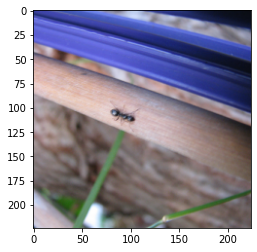

In [43]:
## load the entire dataset
x, y = next(iter(train_dataset))

## print one example
dim = x.shape[1]
print(f'''Dimension of image : {x.shape}\n
Dimension of labels : {y.shape}''')

plt.imshow(x[160].reshape(1,3,224,224).squeeze().T.numpy())

In [44]:
class LR(nn.Module):
  def __init__(self, dim, lr = torch.scalar_tensor(0.01)):
    super(LR, self).__init__()
    #initialize parameters
    self.w = torch.zeros(dim, 1, dtype = torch.float).to(device)
    self.b = torch.scalar_tensor(0).to(device)
    # 자동미분 안하기 때문에 parameter선언 하지 않았음
    self.grads = {'dw':torch.zeros(dim, 1, dtype = torch.float).to(device),
                  'db':torch.scalar_tensor(0).to(device)}
    self.lr = lr.to(device) #learning rate

  def forward(self, x):
    ##compute forward
    z = torch.mm(self.w.T, x) + self.b
    a = self.sigmoid(z)
    return a

  def sigmoid(self, z):
    return 1/(1+torch.exp(-z))

  def backward(self, x, yhat, y):
    ##compute backward
    self.grads['dw'] = (1/x.shape[1]) * torch.mm(x, (yhat-y).T)
    self.grads['db'] = (1/x.shape[1]) * torch.sum(yhat -y)

  def optimize(self):  #미분에 대한 업데이트
    ##optimization step
    self.w = self.w - self.lr * self.grads['dw']
    self.b = self.b - self.lr * self.grads['db']

##utility functions
def loss(yhat, y):
  m = y.size()[1]
  return -(1/m)*torch.sum(y*torch.log(yhat) + (1-y)*torch.log(1-yhat))

def predict(yhat, y):
  y_prediction = torch.zeros(1, y.size()[1])
  for i in range(yhat.size()[1]):
    if yhat[0,i] <= 0.5:
      y_prediction[0,i] = 0
    else:
      y_prediction[0,i] = 1
  return 100 - torch.mean(torch.abs(y_prediction-y)) * 100
   

In [45]:
##model pretesting
x, y = next(iter(train_dataset))

##flatten/transform the data
x_flatten = x.T
y = y.unsqueeze(0)

##num_px is the dimention of the images
dim = x_flatten.shape[0]

##model instance
model = LR(dim)
model.to(device)
yhat = model.forward(x_flatten.to(device))
yhat = yhat.data.cpu()

##calculate loss
cost = loss(yhat, y)
prediction = predict(yhat, y)
print(f'Cost : {cost}')
print(f'Accuracy : {prediction}')

##backpropagate
model.backward(x_flatten.to(device), yhat.to(device), y.to(device))
model.optimize()

Cost : 0.6931472420692444
Accuracy : 50.40983581542969


In [50]:
## hyperparams
costs = []
dim = x_flatten.shape[0]
learning_rate = torch.scalar_tensor(0.0001).to(device)
num_iterations = 100
lrmodel = LR(dim, learning_rate)
lrmodel.to(device)

## transform the data
def transform_data(x,y):
  x_flatten = x.T
  y = y.unsqueeze(0)
  return x_flatten, y

## training the model
for i in range(num_iterations):
  x, y = next(iter(train_dataset))
  test_x, test_y = next(iter(test_dataset))
  x,y = transform_data(x,y)
  test_x, test_y = transform_data(test_x, test_y)

  #forward
  yhat = lrmodel.forward(x.to(device))
  cost = loss(yhat.data.cpu(), y)
  train_pred = predict(yhat, y)

  #backward
  lrmodel.backward(x.to(device),
                   yhat.to(device),
                   y.to(device))
  lrmodel.optimize()

  ##test
  yhat_test = lrmodel.forward(test_x.to(device))
  test_pred = predict(yhat_test, test_y)

  if i % 10 == 0:
    costs.append(cost)

  if i % 10 == 0:
    print(f"Cost after iteration {i} : {cost} | Train Acc : {train_pred} | Test Acc : {test_pred}")


Cost after iteration 0 : 0.6931472420692444 | Train Acc : 50.40983581542969 | Test Acc : 45.75163269042969
Cost after iteration 10 : 0.6691470742225647 | Train Acc : 64.3442611694336 | Test Acc : 54.24836730957031
Cost after iteration 20 : 0.6513182520866394 | Train Acc : 68.44261932373047 | Test Acc : 54.24836730957031
Cost after iteration 30 : 0.6367825269699097 | Train Acc : 68.03278350830078 | Test Acc : 54.24836730957031
Cost after iteration 40 : 0.6245337128639221 | Train Acc : 69.67213439941406 | Test Acc : 54.90196228027344
Cost after iteration 50 : 0.6139225959777832 | Train Acc : 70.90164184570312 | Test Acc : 56.20914840698242
Cost after iteration 60 : 0.6045235395431519 | Train Acc : 72.54098510742188 | Test Acc : 56.86274337768555
Cost after iteration 70 : 0.5960511565208435 | Train Acc : 74.18032836914062 | Test Acc : 57.51633834838867
Cost after iteration 80 : 0.5883084535598755 | Train Acc : 73.77049255371094 | Test Acc : 57.51633834838867
Cost after iteration 90 : 0.58

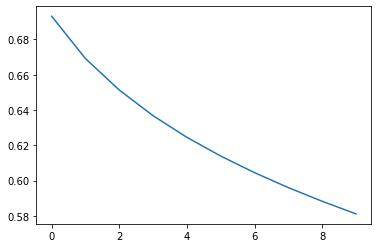

In [51]:
## the trend in the contest of loss
plt.plot(costs)
plt.show()